<a href="https://colab.research.google.com/github/avicennamumtaza/courses-machinelearning/blob/main/kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Kelompok 5

- Avicenna Mumtaza - NIM 2241720112
- Lukman Eka Septiawan - NIM 2241720049
- Nazwa Ayunda M - NIM 2241720013
- Ricky Putra Pratama T - NIM 2241720204  

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
import colorsys
import cv2

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


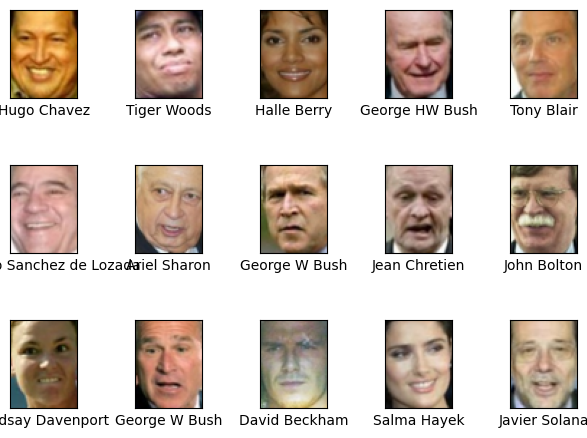

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

In [ ]:
# penyesuaian ukuran gambar
def resize_image(image, target_size=(100, 100)):
    resized_image = resize(image, target_size, anti_aliasing=True)
    return resized_image

# Mengubah ukuran semua gambar menjadi 100x100 piksel
X = faces.images
y = faces.target
resize_images = np.array([resize_image(img, target_size=(100, 100)) for img in X])
print(f"Dimensi gambar setelah resize: {resize_images.shape}")

Dimensi gambar setelah resize: (4324, 100, 100, 3)


# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

In [ ]:
# Fungsi untuk menghitung histogram

def compute_histogram(image, grid_size=(4, 4)):
    histograms = []
    img_height, img_width, num_channels = image.shape
    cell_height, cell_width = img_height // grid_size[0], img_width // grid_size[1]

    for row in range(0, img_height, cell_height):
        for col in range(0, img_width, cell_width):
            cell = image[row:row + cell_height, col:col + cell_width]

            for channel in range(num_channels):
                channel_hist, _ = np.histogram(cell[:, :, channel], bins=256, range=(0, 1))
                histograms.append(channel_hist)

    # Flattening daftar histogram menjadi satu array
    return np.concatenate(histograms)

# Ekstraksi histogram dari semua gambar
X = np.array([compute_histogram(img, grid_size=(5, 5)) for img in resize_images])

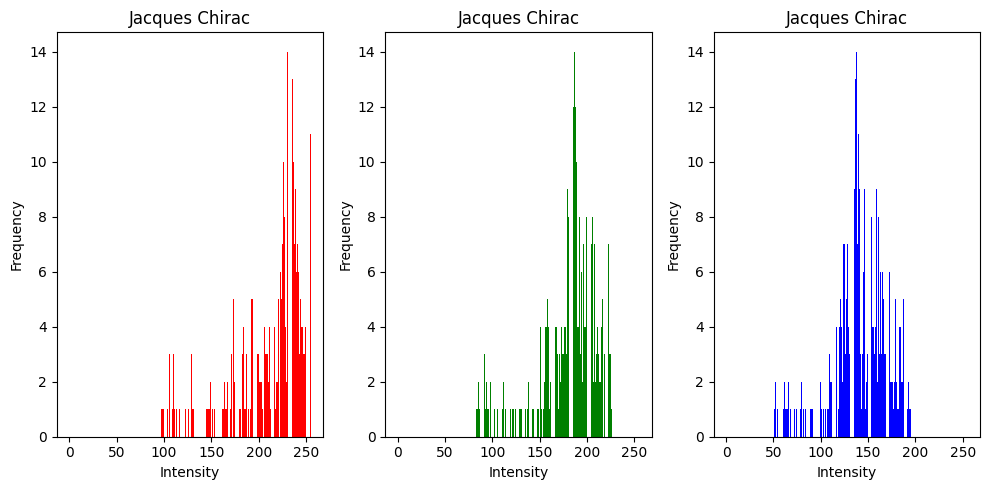

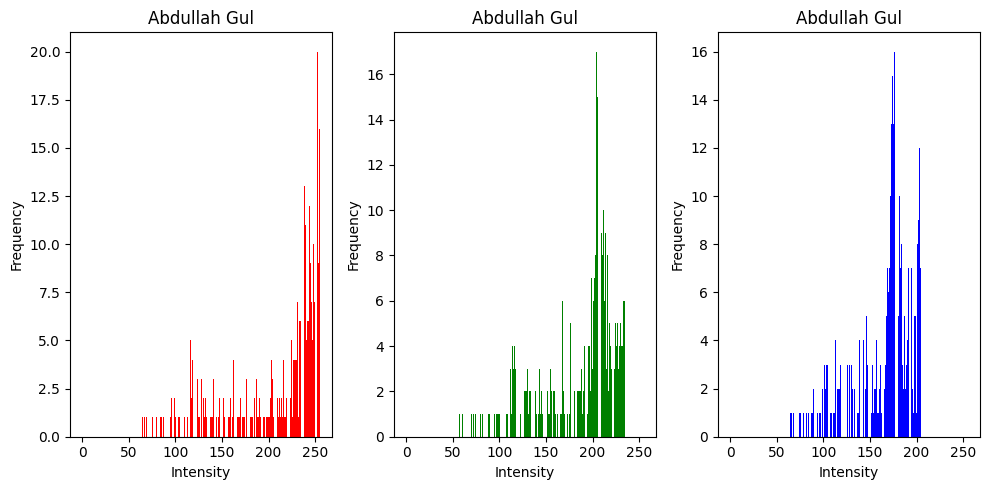

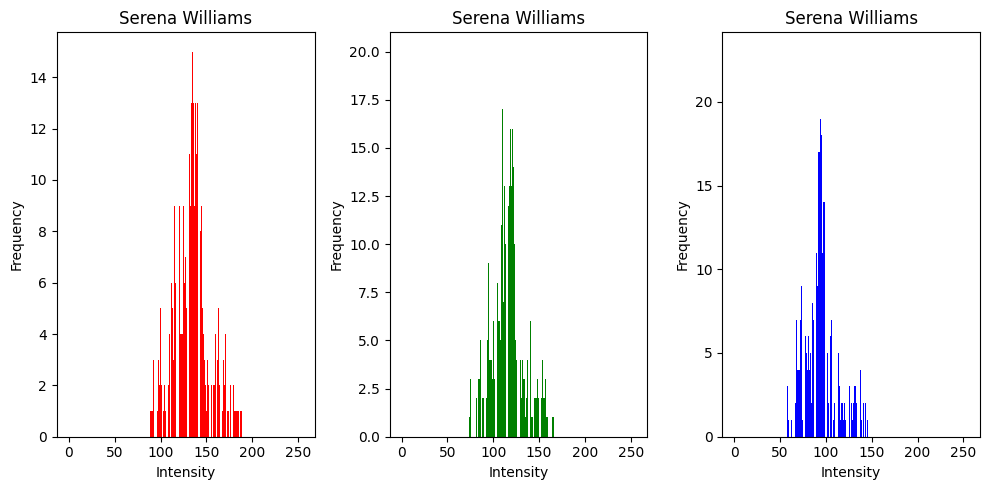

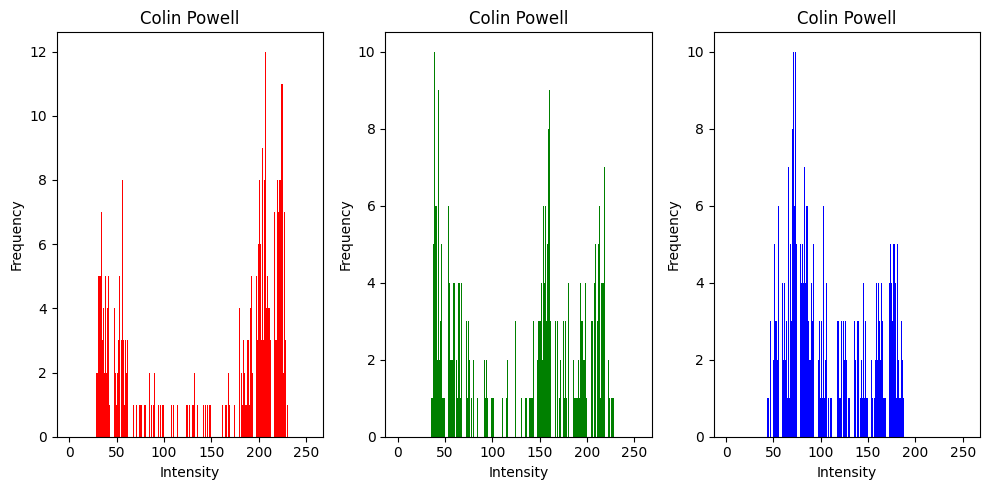

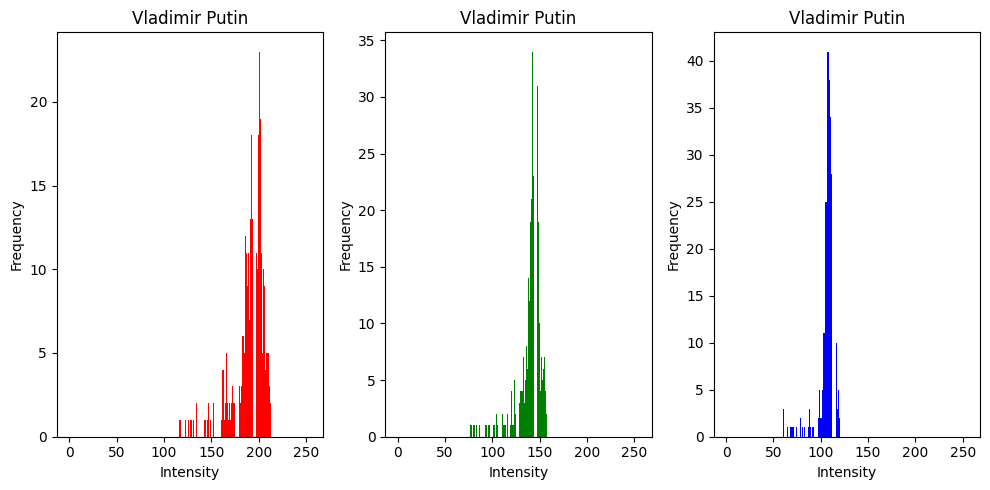

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung histogram

def plot_histogram_for_image(histogram, image_index):
    plt.figure(figsize=(10, 5))
    num_channels = 3

    for i, color in enumerate(['Red', 'Green', 'Blue']):
        # Ambil bagian histogram untuk channel tertentu
        channel_hist = histogram[i * 256:(i + 1) * 256]

        plt.subplot(1, 3, i + 1)
        plt.bar(range(256), channel_hist, color=color.lower())
        plt.title(f"{faces.target_names[faces.target[image_index]]}", fontsize=12)
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

for i in range(5):
    plot_histogram_for_image(X[i], i)


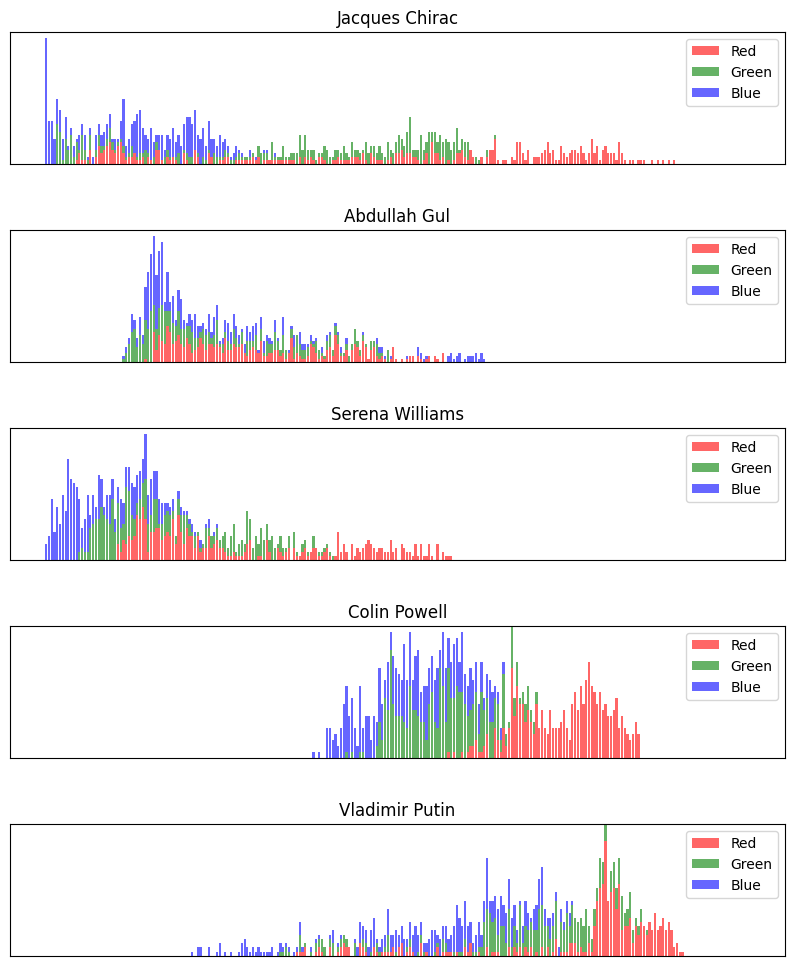

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

# Loop untuk 5 gambar pertama
for idx in range(5):
    random_index = rand_labels[idx]
    ax = axes[idx]

    # Dapatkan histogram untuk setiap channel
    red_hist = X[random_index][:256]
    green_hist = X[random_index][256:512]
    blue_hist = X[random_index][512:768]

    # Plot histogram dengan stacked bars
    ax.bar(range(256), red_hist, color='red', alpha=0.6, label='Red')
    ax.bar(range(256), green_hist, color='green', alpha=0.6, bottom=red_hist, label='Green')
    ax.bar(range(256), blue_hist, color='blue', alpha=0.6, bottom=red_hist + green_hist, label='Blue')

    ax.set_title(f"{faces.target_names[faces.target[idx]]}", fontsize=12)
    ax.legend(loc='upper right')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

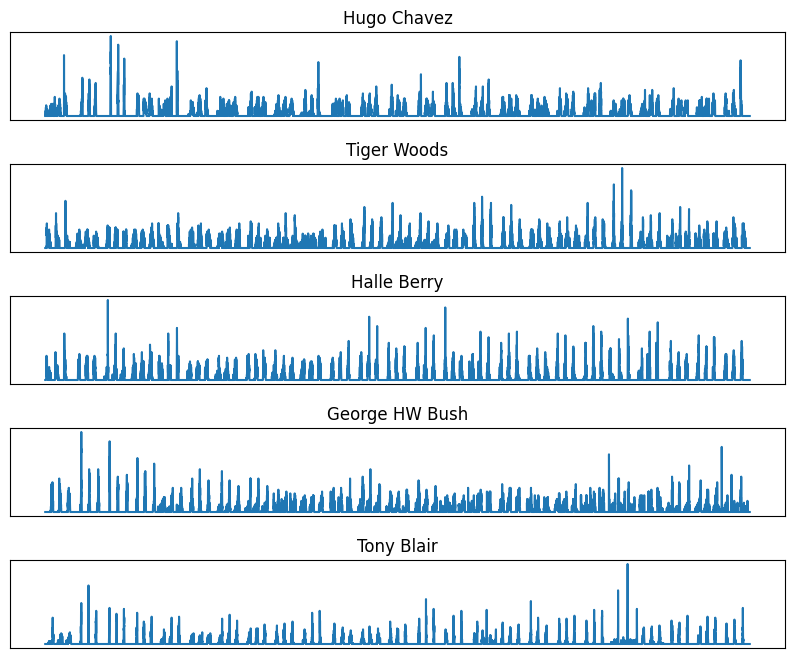

In [ ]:
# Menampilkan histogram

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

for idx, axis in enumerate(axes):
    random_index = rand_labels[idx]
    axis.plot(X[random_index])  # Plot histogram
    axis.set_title(f"{faces.target_names[faces.target[random_index]]}", fontsize=12)
    axis.set_xticks([])
    axis.set_yticks([])

plt.show()

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

In [ ]:
# Pembagian data training dan testing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

Akurasi Model: 33.18%
Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       0.33      0.25      0.29         4
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.11      0.12      0.12         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.15      0.29      0.20         7
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.50      0.50      0.50         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.22      0.38      0.28        16
    Arnold Schwarzenegger       0.33      0.38      0.35         8
     Atal Bihari

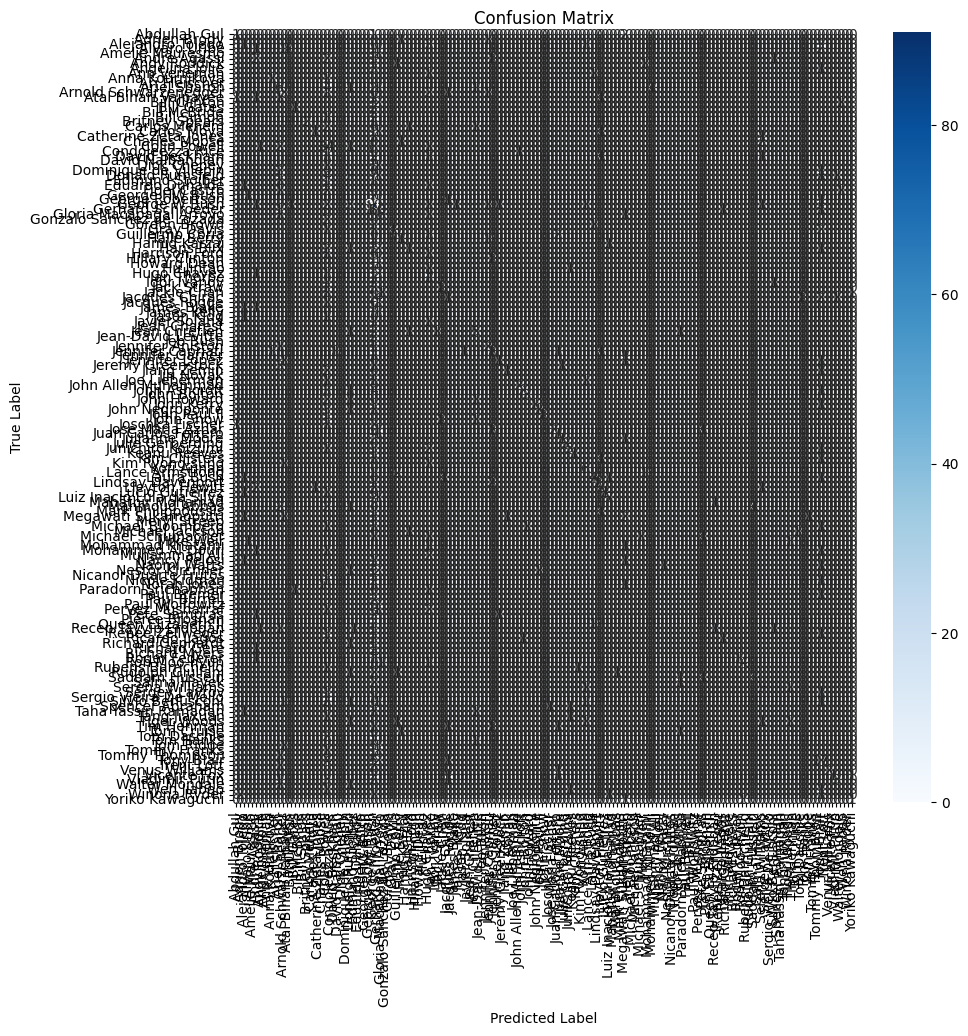

In [ ]:
# Prediksi data testing
y_pred = model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Classification report dengan zero_division
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=0))

# Matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Challenge

Import Library dan Load Data Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

faces = fetch_lfw_people(min_faces_per_person=10, color=True)

print(f'Total sampel: {faces.images.shape[0]}, Dimensi gambar: {faces.images.shape[1:]}')
print(f'Jumlah label: {len(faces.target_names)}')

Total sampel: 4324, Dimensi gambar: (62, 47, 3)
Jumlah label: 158


Diferensiasi input dan label

In [ ]:
# input dan label
X = faces.images
y = faces.target

n_samples, h, w, c = X.shape
X = X.reshape(n_samples, -1)  # (n_samples, h*w*c)

Pembagian dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

PCA

In [ ]:
print("Menggunakan PCA untuk mengurangi dimensi fitur...")
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Menggunakan PCA untuk mengurangi dimensi fitur...


Pelatihan model menggunakan k-NN

In [ ]:
print("Melatih model k-NN...")
k = 10
knn_clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_clf.fit(X_train_pca, y_train)

Melatih model k-NN...


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

Evaluasi akurasi model

In [ ]:
print("Evaluasi akurasi model...")
y_pred = knn_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi data uji: {accuracy * 100:.2f}%")

Evaluasi akurasi model...
Akurasi data uji: 33.53%


Laporan evaluasi model

In [ ]:
# label unik dari y_test
unique_labels = np.unique(y_test)

In [ ]:
from sklearn.metrics import top_k_accuracy_score

# k = 5 maksudnya 5 prediksi teratas
k = 5
top_k_accuracy = top_k_accuracy_score(y_test, knn_clf.predict_proba(X_test_pca), k=k)
print(f"Top {k} Akurasi: {top_k_accuracy * 100:.2f}%")

Top 5 Akurasi: 49.25%


In [ ]:
from sklearn.metrics import f1_score
print("Laporan Evaluasi Model")
print(f"F1 Score: {f1_score(y_test, y_pred, average='micro')}")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=faces.target_names[:len(unique_labels)], zero_division=1))

Laporan Evaluasi Model
F1 Score: 0.3352601156069364
                           precision    recall  f1-score   support

             Abdullah Gul       0.67      0.50      0.57         4
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.09      0.50      0.15         8
             Alvaro Uribe       0.25      0.29      0.27         7
          Amelie Mauresmo       0.20      0.25      0.22         4
             Andre Agassi       0.23      0.43      0.30         7
             Andy Roddick       0.50      0.33      0.40         3
           Angelina Jolie       0.25      0.25      0.25         4
              Ann Veneman       1.00      0.00      0.00         2
          Anna Kournikova       1.00      0.00      0.00         2
            Ari Fleischer       0.50      0.33      0.40         3
             Ariel Sharon       0.24      0.56      0.33        16
    Arnold Schwarzenegger       0.00      0.00      0.00         8
     Atal